In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#import seaborn as sns

import pandas as pd
from sklearn import svm, metrics
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFECV
#from imblearn.over_sampling import SMOTE  #for principal component analysis, I think? 

from sklearn.model_selection import train_test_split

from collections import defaultdict
import math
from random import seed
from random import random

%matplotlib inline


In [121]:
#traindatafeatures= pd.read_csv("train-features_scottannotated.csv")
#ftdata= pd.read_csv("forcetorquebuttonresults_9-12-2021.csv")
ftdata= pd.read_csv("forcetorquebuttonresults_09_15_2021.csv")

In [122]:
#print(traindatafeatures)
#print(ftdata)
ftdata_transposed = ftdata.T
print(ftdata_transposed)

           0      1       2         3         4     5      6      7     \
header0  -0.064  0.084  1.0320 -0.085000  0.006800   0.0  0.016  0.004   
header1  -0.072  0.080  1.0544 -0.077800  0.010400   0.0  0.020  0.000   
header2  -0.084  0.072  1.0592 -0.084600  0.003800   0.0  0.032  0.000   
header3  -0.068  0.084  1.0144 -0.069798  0.021594   0.0  0.016  0.004   
header4  -0.060  0.080  1.0144 -0.080398  0.008798   0.0  0.032 -0.008   
header5  -0.072  0.080  1.0736 -0.082398  0.010998   0.0  0.028 -0.012   
header6  -0.060  0.076  1.0288 -0.083400  0.008396   0.0 -0.024  0.004   
header7  -0.080  0.092  1.0304 -0.085800  0.007000   0.0  0.024 -0.004   
header8  -0.024  0.080  1.0448 -0.073596  0.031998   0.0  0.008 -0.008   
header9  -0.080  0.076  1.0128 -0.074798  0.011598   0.0  0.016 -0.008   
header10 -0.068  0.076  1.0304 -0.079000  0.005602   0.0  0.008 -0.008   
header11 -0.076  0.088  1.0352 -0.081000  0.017200   0.0  0.016  0.008   
header12 -0.068  0.076  1.0160 -0.0885

In [123]:
ftdata['t1']

KeyError: 't1'

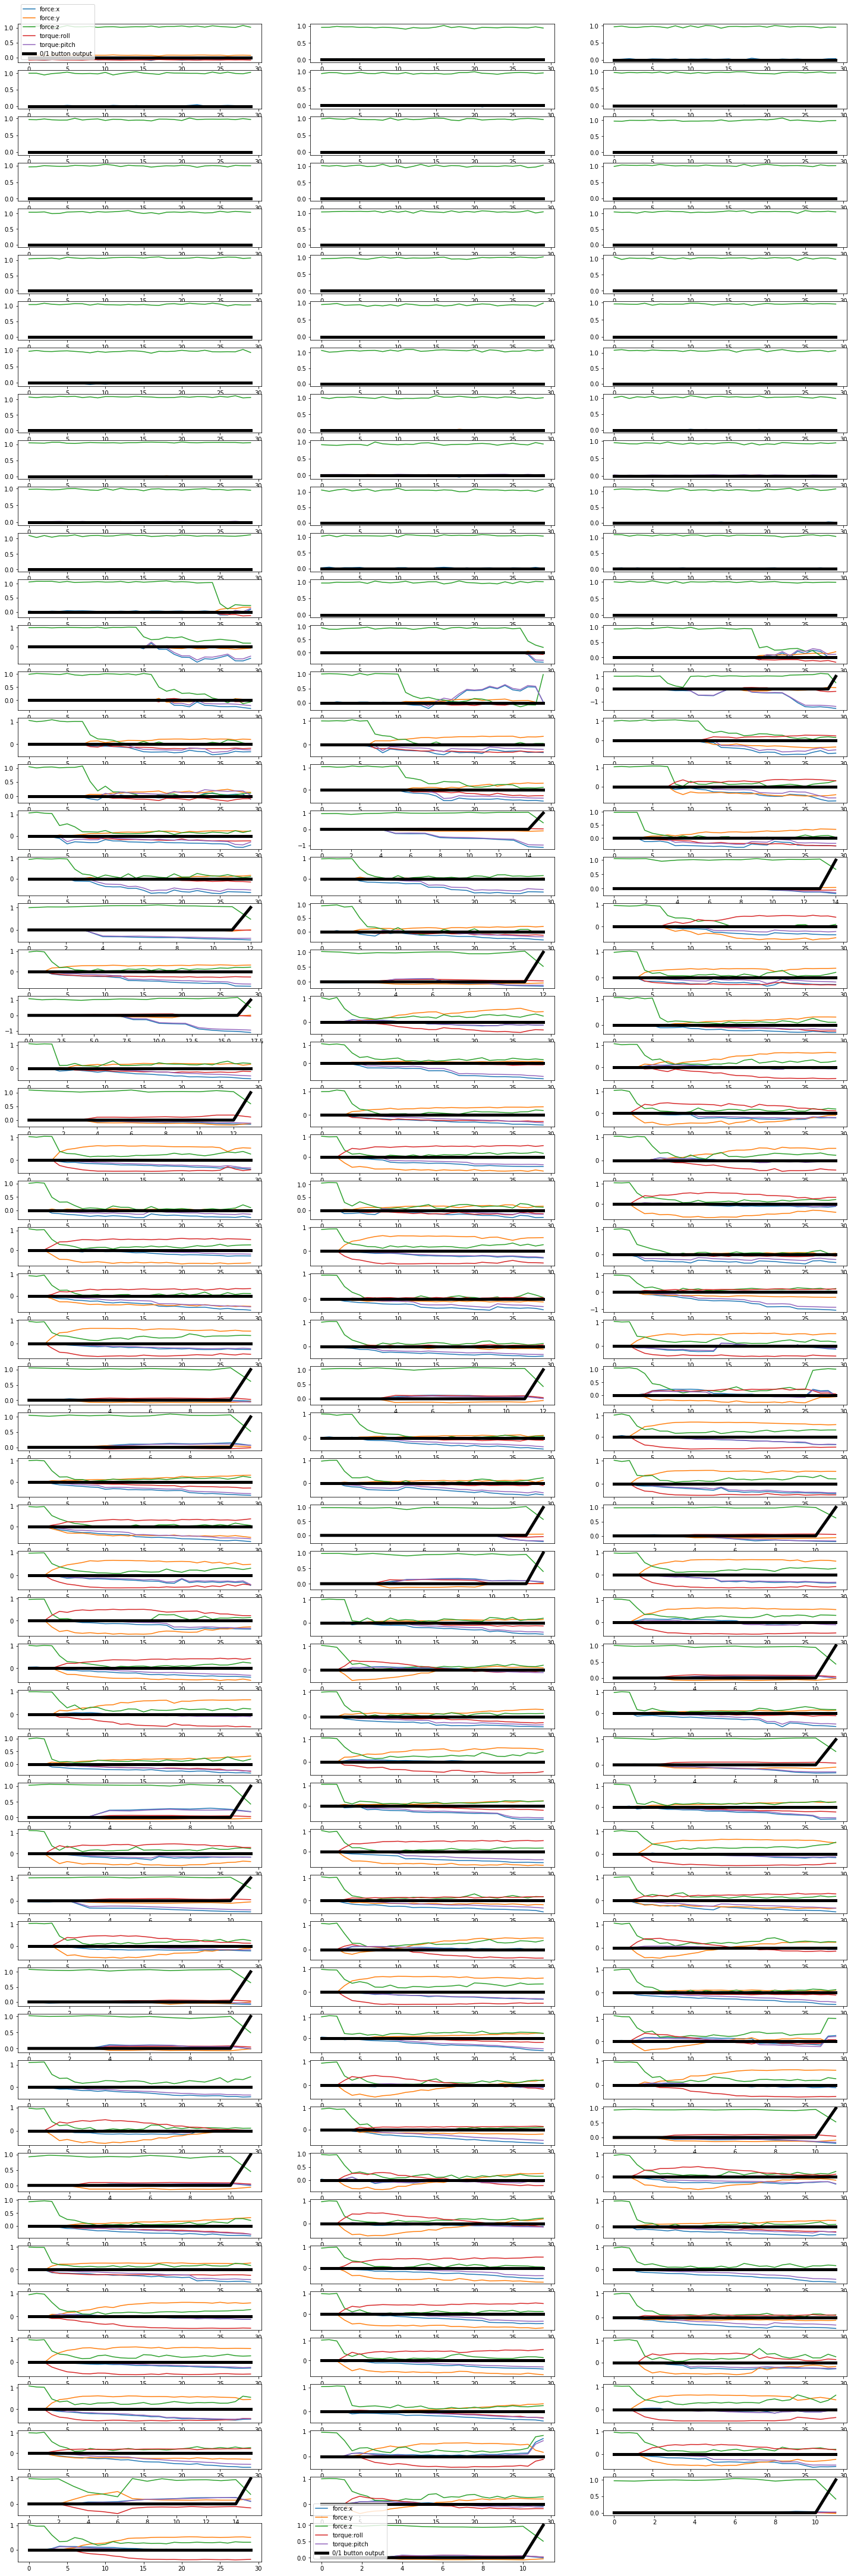

In [129]:
#ftdata['header1'].plot()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#fig, axes = plt.subplots(nrows=1, ncols=5)

#ftdata[0:6]
fig = plt.figure(figsize=(25, 80))
fignum=82*2
for i in range(fignum):

    ax = fig.add_subplot(28*2,3,i+1)
 
    row0=ftdata.iloc[0+(6*i)]
    row1=ftdata.iloc[1+(6*i)]
    row2=ftdata.iloc[2+(6*i)]
    row3=ftdata.iloc[3+(6*i)]
    row4=ftdata.iloc[4+(6*i)]
    row5=ftdata.iloc[5+(6*i)]

    #figure(figsize=(4, *), dpi=80)
    ax.plot(range(30),row0, label="force:x")
    ax.plot(range(30),row1, label="force:y")
    ax.plot(range(30),row2, label="force:z")
    ax.plot(range(30),row3, label="torque:roll")
    ax.plot(range(30),row4, label="torque:pitch")
    ax.plot(range(30),row5, color='black',label="0/1 button output",linewidth=5.0)
    
    
    if i==0 or i==fignum-1:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels,loc='lower left')

#ax.legend(handles, labels)


plt.show()
    #row5.plot()

